Contents
---
- [requests](#requests)
- [BeautifulSoup](#scraping)
- [Using pandas to scrape the web](#pandas)
- [Using the Developer Console](#javascript)

This module is edited from Charles Severance's Python for Informatics book.


In this chapter, we'll learn how to read information from the internet instead of from files. 

Retrieving web pages using the requests package
---
<a class="anchor" id="requests"></a>

The requests library allows you to send HTTP requests using Python. Using requests, you can treat a web page much like a file. You simply indicate which web page you would like to retrieve and requests handles all of the HTTP protocol and header details.

First, go to this website to see what is located on it: http://www.dr-chuck.com/page1.htm

Now, view how the requests package reads this webpage in much like a file:

In [5]:
import requests

url = 'http://www.dr-chuck.com/page1.htm'

response = requests.get(url)

print(response.text)

<h1>The First Page</h1>
<p>
If you like, you can switch to the 
<a href="http://www.dr-chuck.com/page2.htm">
Second Page</a>.
</p>



So response.text prints out the text from the web page. What does response print out? The response from the website. A response of 200 means that you were able to communicate with the website successfully:

In [6]:
print(response)

<Response [200]>


There are tons of different codes you can receive. You've probably received a 403 Forbidden error or a 404 Not Found error when you've gone to a website. All the codes are here:

https://en.wikipedia.org/wiki/List_of_HTTP_status_codes

What if you wanted to print all of the header details that come along with sending an HTTP request? Type:

In [7]:
print(response.headers)

{'Content-Type': 'text/html', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Keep-Alive': 'timeout=15', 'Date': 'Tue, 12 May 2020 18:29:05 GMT', 'Server': 'Apache', 'Last-Modified': 'Sun, 19 Jan 2014 14:25:43 GMT', 'ETag': 'W/"83-4f0538cdba7c0"', 'Content-Encoding': 'gzip'}


The text on this webpage is short but many web pages will contain a lot of info. What if instead of printing all of the text at once you want to print it line by line? We'll need to break up each line by the newline character: 

In [8]:
import requests

url = 'http://www.dr-chuck.com/page1.htm'

lines = requests.get(url).text.split('\n')

for line in lines:
    print(line)

<h1>The First Page</h1>
<p>
If you like, you can switch to the 
<a href="http://www.dr-chuck.com/page2.htm">
Second Page</a>.
</p>



Is there a more Pythonic way of printing each line? Yes. Use the following:

In [12]:
url = 'http://www.dr-chuck.com/page1.htm'

r = requests.get(url)

for line in r.iter_lines():
    print(line)

b'<h1>The First Page</h1>'
b'<p>'
b'If you like, you can switch to the '
b'<a href="http://www.dr-chuck.com/page2.htm">'
b'Second Page</a>.'
b'</p>'


What do those b's stand for? Bytes. To convert from a byte array to strings that you are used to, use decode:

In [14]:
url = 'http://www.dr-chuck.com/page1.htm'

r = requests.get(url)

for line in r.iter_lines():
    print(line.decode())

<h1>The First Page</h1>
<p>
If you like, you can switch to the 
<a href="http://www.dr-chuck.com/page2.htm">
Second Page</a>.
</p>


Suppose that you were making a webcrawler that went to many websites and scraped the other web link anchor tags located on them off of the page. Then if you were using the requests package, you might need some sort of if statement to find just the lines with relevant anchor tags:

In [19]:
url = 'http://www.dr-chuck.com/page1.htm'

r = requests.get(url)

for line in r.iter_lines():
    line = line.decode()
    if '<a' in line:
        print(line)

<a href="http://www.dr-chuck.com/page2.htm">


This is a super gross way of looking for stuff on a webpage, though. Is there an easier way? Yes! Using the BeautifulSoup package!

Web Scraping using BeautifulSoup
---
<a class="anchor" id="scraping"></a>

One of the common uses of the requests capability in Python is to scrape the web. Web scraping is when we write a program that pretends to be a web browser and retrieves pages, then examines the data in those pages looking for patterns.

As an example, a search engine such as Google will look at the source of one web page and extract the links to other pages and retrieve those pages, extracting links, and so on. Using this technique, Google spiders its way through nearly all of the pages on the web.


Google also uses the frequency of links from pages it finds to a particular page as one measure of how “important” a page is and how high the page should appear in its search results. 

BeautifulSoup is one Python package that helps us to scrape the web. BeautifulSoup tolerates highly flawed HTML and still lets you easily extract the data you need.

If you have Anaconda installed on your computer, you probably already have it. If you don't have BeautifulSoup, to download it, type "conda install bs4" or "pip install bs4" into your terminal. (You can find your terminal under Applications - Utilities on a Mac). If that doesn't work, download it directly from this website: https://www.crummy.com/software/BeautifulSoup/

Try running the following cell to see if you have BeautifulSoup installed:

In [20]:
from bs4 import BeautifulSoup

Running the above webpage through Beautiful Soup gives us a BeautifulSoup object, which represents the document as a nested data structure. If we print the soup object, it will look like your requests output above:

In [37]:
url = 'http://www.dr-chuck.com/page1.htm'

r = requests.get(url)

soup = BeautifulSoup(r.text, "html.parser")

print(soup)

<h1>The First Page</h1>
<p>
If you like, you can switch to the 
<a href="http://www.dr-chuck.com/page2.htm">
Second Page</a>.
</p>



However, this soup data structure will contain a lot of additional functionality. For example, we can add indentation to see the structure of the webpage better using prettify:

In [39]:
print(soup.prettify())

<h1>
 The First Page
</h1>
<p>
 If you like, you can switch to the
 <a href="http://www.dr-chuck.com/page2.htm">
  Second Page
 </a>
 .
</p>



In addition, this soup data structure will contain many other pieces of nested info. For example, if you only wanted all of the anchor tags, you could type:

In [23]:
soup.find_all('a')

[<a href="http://www.dr-chuck.com/page2.htm">
 Second Page</a>]

Or as a shortcut, you could type:

In [24]:
soup('a')

[<a href="http://www.dr-chuck.com/page2.htm">
 Second Page</a>]

Notice that even though there is only one anchor tag above, these commands return it in a list with brackets around it, in case there are multiple anchor tags. If you wanted to find just the first web anchor tag, you could type:

In [25]:
soup.find('a')

<a href="http://www.dr-chuck.com/page2.htm">
Second Page</a>

Or more simply:

In [26]:
soup.a

<a href="http://www.dr-chuck.com/page2.htm">
Second Page</a>

The anchor tag itself actually contains a lot of nested info. We'll often want to grab just the URL contained between the tag:

In [28]:
tag = soup.find('a')

tag.get('href')

'http://www.dr-chuck.com/page2.htm'

Or, just the text contained between the tag:

In [30]:
tag = soup.find('a')

tag.get_text().strip()

'Second Page'

Or more simply:

In [34]:
tag.text.strip()

'Second Page'

In summary, let's suppose we wanted to go to this website and print all of the urls and text contained within the anchor tags. Read this code carefully to see what each step is doing:

In [36]:
#State the url you want to go to
url = 'http://www.dr-chuck.com/page1.htm'

#Retrieve the web page contents from this url
r = requests.get(url)

#Create a BeautifulSoup Object, which represents the web page content
#as a nested data structure
soup = BeautifulSoup(r.text, "html.parser")

# Retrieve all of the anchor (i.e, web) tags
tags = soup('a')

#Iterate through each tag and print the url and text specifically
for tag in tags:
    print('URL: ', tag.get('href'))
    print('TEXT: ', tag.text.strip())

URL:  http://www.dr-chuck.com/page2.htm
TEXT:  Second Page


Sometimes, contents and attributes are another way to get various parts of important information:

In [44]:
tag = soup.find('a')
print(tag.contents)
print(tag.attrs)

['\nSecond Page']
{'href': 'http://www.dr-chuck.com/page2.htm'}


As another example, suppose that you read in a webpage containing the contents below:

In [46]:
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<a href="http://example.com/alice" class="maincharacter" id="link">Alice</a>,

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p href="http://example.com/other" class="sister" id="link4">Were there any other sisters?</p>;

<p class="story">...</p>
"""

soup = BeautifulSoup(html_doc, 'html.parser')

print(soup.prettify())

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <a class="maincharacter" href="http://example.com/alice" id="link">
   Alice
  </a>
  ,
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="sister" href="http://example.com/other" id="link4">
   Were there any other sisters?
  </p>
  ;
  <p class="story">
   ...
  </p>
 </body>
</html>


Notice that there are four anchor tags:

In [47]:
soup.find_all('a')

[<a class="maincharacter" href="http://example.com/alice" id="link">Alice</a>,
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

Recall that CSS classes are often given to tags in order to style them similarly. For example, perhaps all of the sister's names should be listed in purple or italicized. To limit our scope to just the tags with the class "sister", we can type the following (note that class has an underscore attached since class is a reserved word in Python:

In [48]:
soup.find_all(class_ = "sister")

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>,
 <p class="sister" href="http://example.com/other" id="link4">Were there any other sisters?</p>]

If we wanted to limit our scope to just the three sisters' names, we could limit our search to only the a tags and ignore the p tag:

In [49]:
soup.find_all("a", class_ = "sister")

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

If we wanted to print each sister's name, we could type:

In [51]:
for tag in soup.find_all("a", class_ = "sister"):
    print(tag.get_text())

Elsie
Lacie
Tillie


If we wanted to print their urls, we could type:

In [53]:
for tag in soup.find_all("a", class_ = "sister"):
    print(tag.get('href'))

http://example.com/elsie
http://example.com/lacie
http://example.com/tillie


### Exercise 1: Pokemon

Below is a portion of the html taken from this website: https://www.pokemon.com/us/pokedex/squirtle

Use Beautiful Soup to print the text associated with the a.) attribute titles and b.) attribute values in the html below. Your final output should be this:

```
Titles:
Name
Height
Weight

Values:
Squirtle
1' 08"
19.8 lbs
```

In [57]:
html_doc = """
<html><head><title>Pokemon</title></head>
<body>
    <h1> Pokemon Stats </h1>
        <ul>
          <li>
            <span class="attribute-title">Name</span>
            <span class="attribute-value">Squirtle</span>
          </li>
          <li>
            <span class="attribute-title">Height</span>
            <span class="attribute-value">1' 08"</span>
          </li>

          <li>
            <span class="attribute-title">Weight</span>
            <span class="attribute-value">19.8 lbs</span>
          </li>
        </ul>

      </div>
</body>
"""

soup = BeautifulSoup(html_doc, 'html.parser')

print(soup.prettify())

<html>
 <head>
  <title>
   Pokemon
  </title>
 </head>
 <body>
  <h1>
   Pokemon Stats
  </h1>
  <ul>
   <li>
    <span class="attribute-title">
     Name
    </span>
    <span class="attribute-value">
     Squirtle
    </span>
   </li>
   <li>
    <span class="attribute-title">
     Height
    </span>
    <span class="attribute-value">
     1' 08"
    </span>
   </li>
   <li>
    <span class="attribute-title">
     Weight
    </span>
    <span class="attribute-value">
     19.8 lbs
    </span>
   </li>
  </ul>
 </body>
</html>



In [186]:
#insert exercise 1

### Exercise 2: Super Bowls
Below is a portion of html taken from the page https://en.wikipedia.org/wiki/List_of_Super_Bowl_champions
    
Print all of the text located within the td tags (remember that td tags indicate cells in a table). Strip the whitespace away. Your output should look like this:

```
I[sb 1]
February 5, 2017 (2016)
New England PatriotsA(9, 5–4)
34–28 (OT)
Atlanta FalconsN(2, 0–2)
NRG Stadium (2)[sb 14]
Houston, Texas (3)
70,807
[77][73][75][76]
LII
February 4, 2018 (2017)
Philadelphia EaglesN(3, 1–2)
41–33
New England PatriotsA(10, 5–5)
U.S. Bank Stadium
Minneapolis, Minnesota (2)
67,612
[78][79][80][81][82]
LIII
February 3, 2019 (2018)
New England PatriotsA(11, 6–5)
13–3
Los Angeles RamsN(4, 1–3)
Mercedes-Benz Stadium
Atlanta, Georgia (3)
70,081
[83][84][85]
LIV
February 2, 2020 (2019)
Kansas City ChiefsA(3, 2–1)
31–20
San Francisco 49ersN(7, 5–2)
Hard Rock Stadium (6)[sb 12]
Miami Gardens, Florida (11)[sb 3]
62,417
[84][85]
```

In [89]:
html_doc = """
<html><head><title>Super Bowl Champions</title></head>
<table class="wikitable sortable">
<caption>Super Bowl championships
</caption>
<tbody><tr>
<th>Game
</th>
<th>Date/<wbr />Season
</th>
<th>Winning team
</th>
<th>Score
</th>
<th>Losing team
</th>
<th>Venue
</th>
<th>City
</th>
<th>Attendance
</th>
<th class="unsortable">Ref
</th></tr>
<tr>
<td style="text-align: center;"><span data-sort-value="01&#160;!"><a href="/wiki/Super_Bowl_I" title="Super Bowl I">I</a><br /><sup id="cite_ref-WCGs_12-0" class="reference"><a href="#cite_note-WCGs-12">&#91;sb 1&#93;</a></sup></span>
</td>
<td><span data-sort-value="000000002017-02-05-0000" style="white-space:nowrap">February 5, 2017</span> (<a href="/wiki/2016_NFL_season" title="2016 NFL season">2016</a>)
</td>
<td style="background:#ffcccc;"><span data-sort-value="New England Patriots 09&#160;!"><a href="/wiki/2016_New_England_Patriots_season" title="2016 New England Patriots season">New England Patriots</a><sup>A</sup><br /><small>(9, <abbr title="5 wins, 4 losses">5–4</abbr>)</small></span>
</td>
<td style="text-align: center;"><span data-sort-value="3428&#160;!">34–28 (<a href="/wiki/Overtime_(sports)" title="Overtime (sports)">OT</a>)</span>
</td>
<td style="background:#d0e7ff;"><span data-sort-value="Atlanta Falcons 02&#160;!"><a href="/wiki/2016_Atlanta_Falcons_season" title="2016 Atlanta Falcons season">Atlanta Falcons</a><sup>N</sup><br /><small>(2, <abbr title="0 wins, 2 losses">0–2</abbr>)</small></span>
</td>
<td><span data-sort-value="NRG Stadium 02&#160;!"><a href="/wiki/NRG_Stadium" title="NRG Stadium">NRG Stadium</a> (2)<sup id="cite_ref-HoustonStadium_69-1" class="reference"><a href="#cite_note-HoustonStadium-69">&#91;sb 14&#93;</a></sup></span>
</td>
<td><span data-sort-value="Houston, Texas 03&#160;!"><a href="/wiki/Houston,_Texas" class="mw-redirect" title="Houston, Texas">Houston, Texas</a> (3)</span>
</td>
<td style="text-align: center;"><span data-sort-value="070807&#160;!">70,807</span>
</td>
<td style="text-align: center;"><sup id="cite_ref-94" class="reference"><a href="#cite_note-94">&#91;77&#93;</a></sup><wbr /><sup id="cite_ref-AriNotTampa_89-2" class="reference"><a href="#cite_note-AriNotTampa-89">&#91;73&#93;</a></sup><wbr /><sup id="cite_ref-San_Francisco_awarded_Super_Bowl_L_92-1" class="reference"><a href="#cite_note-San_Francisco_awarded_Super_Bowl_L-92">&#91;75&#93;</a></sup><wbr /><sup id="cite_ref-BayAreaHouston_93-1" class="reference"><a href="#cite_note-BayAreaHouston-93">&#91;76&#93;</a></sup>
</td></tr>
<tr>
<td style="text-align: center;"><span data-sort-value="52&#160;!"><a href="/wiki/Super_Bowl_LII" title="Super Bowl LII">LII</a></span>
</td>
<td><span data-sort-value="000000002018-02-04-0000" style="white-space:nowrap">February 4, 2018</span> (<a href="/wiki/2017_NFL_season" title="2017 NFL season">2017</a>)
</td>
<td style="background:#d0e7ff;"><span data-sort-value="Philadelphia Eagles 03&#160;!"><a href="/wiki/2017_Philadelphia_Eagles_season" title="2017 Philadelphia Eagles season">Philadelphia Eagles</a><sup>N</sup><br /><small>(3, <abbr title="1 win, 2 losses">1–2</abbr>)</small></span>
</td>
<td style="text-align: center;"><span data-sort-value="4133&#160;!">41–33</span>
</td>
<td style="background:#ffcccc;"><span data-sort-value="New England Patriots 10&#160;!"><a href="/wiki/2017_New_England_Patriots_season" title="2017 New England Patriots season">New England Patriots</a><sup>A</sup><br /><small>(10, <abbr title="5 wins, 5 losses">5–5</abbr>)</small></span>
</td>
<td><span data-sort-value="U.S. Bank Stadium 01&#160;!"><a href="/wiki/U.S._Bank_Stadium" title="U.S. Bank Stadium">U.S. Bank Stadium</a></span>
</td>
<td><span data-sort-value="Minneapolis, Minnesota 02&#160;!"><a href="/wiki/Minneapolis,_Minnesota" class="mw-redirect" title="Minneapolis, Minnesota">Minneapolis, Minnesota</a> (2)</span>
</td>
<td style="text-align: center;"><span data-sort-value="067612&#160;!">67,612</span>
</td>
<td style="text-align: center;"><sup id="cite_ref-SBLII_Gamebook_95-0" class="reference"><a href="#cite_note-SBLII_Gamebook-95">&#91;78&#93;</a></sup><wbr /><sup id="cite_ref-96" class="reference"><a href="#cite_note-96">&#91;79&#93;</a></sup><wbr /><sup id="cite_ref-Min2018_97-0" class="reference"><a href="#cite_note-Min2018-97">&#91;80&#93;</a></sup><wbr /><sup id="cite_ref-98" class="reference"><a href="#cite_note-98">&#91;81&#93;</a></sup><wbr /><sup id="cite_ref-99" class="reference"><a href="#cite_note-99">&#91;82&#93;</a></sup>
</td></tr>
<tr>
<td style="text-align: center;"><span data-sort-value="53&#160;!"><a href="/wiki/Super_Bowl_LIII" title="Super Bowl LIII">LIII</a></span>
</td>
<td><span data-sort-value="000000002019-02-03-0000" style="white-space:nowrap">February 3, 2019</span> (<a href="/wiki/2018_NFL_season" title="2018 NFL season">2018</a>)
</td>
<td style="background:#ffcccc;"><span data-sort-value="New England Patriots 11&#160;!"><a href="/wiki/2018_New_England_Patriots_season" title="2018 New England Patriots season">New England Patriots</a><sup>A</sup><br /><small>(11, <abbr title="6 wins, 5 losses">6–5</abbr>)</small></span>
</td>
<td style="text-align: center;"><span data-sort-value="1303&#160;!">13–3&#160;</span>
</td>
<td style="background:#d0e7ff;"><span data-sort-value="Los Angeles Rams 04&#160;!"><a href="/wiki/2018_Los_Angeles_Rams_season" title="2018 Los Angeles Rams season">Los Angeles Rams</a><sup>N</sup><br /><small>(4, <abbr title="1 win, 3 losses">1–3</abbr>)</small></span>
</td>
<td><span data-sort-value="Mercedes-Benz Stadium 01&#160;!"><a href="/wiki/Mercedes-Benz_Stadium" title="Mercedes-Benz Stadium">Mercedes-Benz Stadium</a></span>
</td>
<td><span data-sort-value="Atlanta, Georgia 03&#160;!"><a href="/wiki/Atlanta,_Georgia" class="mw-redirect" title="Atlanta, Georgia">Atlanta, Georgia</a> (3)</span>
</td>
<td style="text-align: center;"><span data-sort-value="070081&#160;!">70,081</span>
</td>
<td style="text-align: center;"><sup id="cite_ref-SBLIII_Gamebook_100-0" class="reference"><a href="#cite_note-SBLIII_Gamebook-100">&#91;83&#93;</a></sup><wbr /><sup id="cite_ref-FutureSBGames_101-0" class="reference"><a href="#cite_note-FutureSBGames-101">&#91;84&#93;</a></sup><wbr /><sup id="cite_ref-Super_Bowls_2019_2020_2021_102-0" class="reference"><a href="#cite_note-Super_Bowls_2019_2020_2021-102">&#91;85&#93;</a></sup>
</td></tr>
<tr>
<td style="text-align: center;"><span data-sort-value="54&#160;!"><a href="/wiki/Super_Bowl_LIV" title="Super Bowl LIV">LIV</a></span>
</td>
<td><span data-sort-value="000000002020-02-02-0000" style="white-space:nowrap">February 2, 2020</span> (<a href="/wiki/2019_NFL_season" title="2019 NFL season">2019</a>)
</td>
<td style="background:#ffcccc;"><a href="/wiki/2019_Kansas_City_Chiefs_season" title="2019 Kansas City Chiefs season">Kansas City Chiefs</a><sup>A</sup><br /><small>(3, <abbr title="2 wins, 1 loss">2–1</abbr>)</small>
<br />
</td>
<td style="text-align: center;"><span data-sort-value="1303&#160;!">31–20&#160;</span>
</td>
<td style="background:#d0e7ff;"><a href="/wiki/2019_San_Francisco_49ers_season" title="2019 San Francisco 49ers season">San Francisco 49ers</a><sup>N</sup><br /><small>(7, <abbr title="5 wins, 2 losses">5–2</abbr>)</small>
<br />
</td>
<td><span data-sort-value="Hard Rock Stadium 06&#160;!"><a href="/wiki/Hard_Rock_Stadium" title="Hard Rock Stadium">Hard Rock Stadium</a> (6)<sup id="cite_ref-MiamiStadium_50-5" class="reference"><a href="#cite_note-MiamiStadium-50">&#91;sb 12&#93;</a></sup></span>
</td>
<td><span data-sort-value="Miami, Florida 11&#160;!"><a href="/wiki/Miami_Gardens,_Florida" title="Miami Gardens, Florida">Miami Gardens, Florida</a> (11)<sup id="cite_ref-MiamiCSA_17-10" class="reference"><a href="#cite_note-MiamiCSA-17">&#91;sb 3&#93;</a></sup></span>
</td>
<td style="text-align: center;"><span data-sort-value="062417&#160;!">62,417</span>
</td>
<td style="text-align: center;"><sup id="cite_ref-FutureSBGames_101-1" class="reference"><a href="#cite_note-FutureSBGames-101">&#91;84&#93;</a></sup><wbr /><sup id="cite_ref-Super_Bowls_2019_2020_2021_102-1" class="reference"><a href="#cite_note-Super_Bowls_2019_2020_2021-102">&#91;85&#93;</a></sup>
</td></tr>
"""

soup = BeautifulSoup(html_doc, 'html.parser')

print(soup.prettify())

<html>
 <head>
  <title>
   Super Bowl Champions
  </title>
 </head>
 <table class="wikitable sortable">
  <caption>
   Super Bowl championships
  </caption>
  <tbody>
   <tr>
    <th>
     Game
    </th>
    <th>
     Date/
     <wbr/>
     Season
    </th>
    <th>
     Winning team
    </th>
    <th>
     Score
    </th>
    <th>
     Losing team
    </th>
    <th>
     Venue
    </th>
    <th>
     City
    </th>
    <th>
     Attendance
    </th>
    <th class="unsortable">
     Ref
    </th>
   </tr>
   <tr>
    <td style="text-align: center;">
     <span data-sort-value="01 !">
      <a href="/wiki/Super_Bowl_I" title="Super Bowl I">
       I
      </a>
      <br/>
      <sup class="reference" id="cite_ref-WCGs_12-0">
       <a href="#cite_note-WCGs-12">
        [sb 1]
       </a>
      </sup>
     </span>
    </td>
    <td>
     <span data-sort-value="000000002017-02-05-0000" style="white-space:nowrap">
      February 5, 2017
     </span>
     (
     <a href="/wiki/2016_NFL_sea

In [187]:
#insert exercise 2

Using Pandas to Webscrape
---
Pandas has super cool built in functionality that lets you read tables from websites! It doesn't work on all tables, but when it does work, it saves you a heck of a lot of time!
<a class="anchor" id="http"></a>

Recall our Super Bowl champion exercise from above:

https://en.wikipedia.org/wiki/List_of_Super_Bowl_champions

There are several tables on the website. We can print all of them in just a few lines of code!

In [95]:
import pandas as pd
url = 'https://en.wikipedia.org/wiki/List_of_Super_Bowl_champions'
tables = pd.read_html(url)
print(tables)

[                      (1966–1969)                      (1970–present)
0  National Football League (NFL)  National Football Conference (NFC)
1           NFL championn(4, 2–2)            NFC championN(50, 25–25)
2  American Football League (AFL)  American Football Conference (AFC)
3           AFL championa(4, 2–2)            AFC championA(50, 25–25),          Game                           Date/Season  \
0     I[sb 1]  January 15, 1967 (1966 AFL/1966 NFL)   
1    II[sb 1]  January 14, 1968 (1967 AFL/1967 NFL)   
2   III[sb 1]  January 12, 1969 (1968 AFL/1968 NFL)   
3    IV[sb 1]  January 11, 1970 (1969 AFL/1969 NFL)   
4           V               January 17, 1971 (1970)   
5          VI               January 16, 1972 (1971)   
6         VII               January 14, 1973 (1972)   
7        VIII               January 13, 1974 (1973)   
8          IX               January 12, 1975 (1974)   
9           X               January 18, 1976 (1975)   
10         XI                January 9, 197

It looks like the table I'm really interested in is the second one. Let's print that one:

In [96]:
df = tables[1]
df

,Game,Date/Season,Winning team,Score,Losing team,Venue,City,Attendance,Ref
0,I[sb 1],"January 15, 1967 (1966 AFL/1966 NFL)","Green Bay Packersn(1, 1–0)",35–10,"Kansas City Chiefsa(1, 0–1)",Los Angeles Memorial Coliseum,"Los Angeles, California[sb 2]",61946,[12][13]
1,II[sb 1],"January 14, 1968 (1967 AFL/1967 NFL)","Green Bay Packersn(2, 2–0)",33–14,"Oakland Raidersa(1, 0–1)",Miami Orange Bowl,"Miami, Florida[sb 3]",75546,[14][13]
2,III[sb 1],"January 12, 1969 (1968 AFL/1968 NFL)","New York Jetsa(1, 1–0)",16–7,"Baltimore Coltsn(1, 0–1)",Miami Orange Bowl (2),"Miami, Florida (2)[sb 3]",75389,[15][13]
3,IV[sb 1],"January 11, 1970 (1969 AFL/1969 NFL)","Kansas City Chiefsa(2, 1–1)",23–7,"Minnesota Vikingsn(1, 0–1)",Tulane Stadium,"New Orleans, Louisiana",80562,[16][13]
4,V,"January 17, 1971 (1970)","Baltimore ColtsA(2, 1–1)",16–13,"Dallas CowboysN(1, 0–1)",Miami Orange Bowl (3),"Miami, Florida (3)[sb 3]",79204,[17][13]
5,VI,"January 16, 1972 (1971)","Dallas CowboysN(2, 1–1)",24–3,"Miami DolphinsA(1, 0–1)",Tulane Stadium (2),"New Orleans, Louisiana (2)",81023,[18][13]
6,VII,"January 14, 1973 (1972)","Miami DolphinsA(2, 1–1)",14–7,"Washington RedskinsN(1, 0–1)",Los Angeles Memorial Coliseum (2),"Los Angeles, California (2)[sb 2]",90182,[19][13]
7,VIII,"January 13, 1974 (1973)","Miami DolphinsA(3, 2–1)",24–7,"Minnesota VikingsN(2, 0–2)",Rice Stadium[sb 4],"Houston, Texas",71882,[20][13]
8,IX,"January 12, 1975 (1974)","Pittsburgh SteelersA(1, 1–0)",16–6,"Minnesota VikingsN(3, 0–3)",Tulane Stadium (3),"New Orleans, Louisiana (3)",80997,[21][13]
9,X,"January 18, 1976 (1975)","Pittsburgh SteelersA(2, 2–0)",21–17,"Dallas CowboysN(3, 1–2)",Miami Orange Bowl (4),"Miami, Florida (4)[sb 3]",80187,[22][13]


This a way quicker, cleaner way of getting the data than searching for the td tags using Beautiful Soup like you did in the exercise above!

As another example, let's get the NBA MVPs from this page: https://en.wikipedia.org/wiki/NBA_Most_Valuable_Player_Award

In [97]:
url = 'https://en.wikipedia.org/wiki/NBA_Most_Valuable_Player_Award'
tables = pd.read_html(url)
print(tables)

[   National Basketball Association awards and honors  \
                                        Championship   
0       Larry O'Brien Trophy  Brown Trophy (defunct)   
1                               Larry O'Brien Trophy   
2                                  Individual awards   
3  All-Star Game MVP Coach of the Year Community ...   
4  All-Star Game MVP Coach of the Year Community ...   
5                                             Honors   
6   All-NBA Team All-Rookie Team  All-Defensive Team   
7                       All-NBA Team All-Rookie Team   
8                                                vte   

                                  Unnamed: 1_level_0  
                                  Unnamed: 1_level_1  
0                                                NaN  
1                             Brown Trophy (defunct)  
2                                                NaN  
3                                                NaN  
4  Most Improved Player Most Valuable Player Rook...

We notice that there are quite a few tables but after some searching we find out that the 6th table is the one relevant to us:

In [98]:
df=tables[5]
df.head()

,Season,Player,Position,Nationality,Team
0,1955–56,Bob Pettit*,Power forward,United States,St. Louis Hawks
1,1956–57,Bob Cousy*,Point guard,United States,Boston Celtics
2,1957–58,Bill Russell*,Center,United States,Boston Celtics (2)
3,1958–59,Bob Pettit* (2),Power forward,United States,St. Louis Hawks (2)
4,1959–60,Wilt Chamberlain*,Center,United States,Philadelphia Warriors


Think about all of the built-in pandas stuff that we now have access to. We could view the most popular positions of the MVPs, for example:

In [99]:
df['Position'].value_counts()

Center            24
Power forward     11
Point guard       11
Small forward      9
Shooting guard     8
Center/Forward     1
Name: Position, dtype: int64

### Pandas Exercise 1: Weather

Create a pandas table for the first table located on this weather page: https://forecast.weather.gov/MapClick.php?lat=45.44763999999998&lon=-122.76902000000001#.WqL4D5MbOu4

In [188]:
#insert exercise 1

### Pandas Exercise 2: College Football Championships

Create a dataframe of college football champions from https://en.wikipedia.org/wiki/College_football_national_championships_in_NCAA_Division_I_FBS

There are many tables on this page - use the one for "Poll era national championships by school (1936–present)" towards the bottom. It should have Princeton with 28 championships as the first row.

In [189]:
#insert exercise 2

### Exercise 3: 

Run the following cell to view a histogram for the number of championships. Are you appreciating yet all of the data science functionality built into pandas???!!! You just created a histogram of data collected from a website in only a few lines of code!

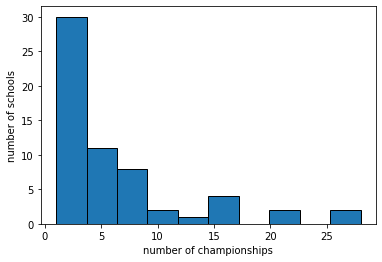

In [116]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df['Championships'].plot.hist(edgecolor='k');
plt.xlabel('number of championships');
plt.ylabel('number of schools');

Using the Developer console to help you find stuff
---
<a class="anchor" id="javascript"></a>

Recall that in a previous exercise you used pandas to get a weather table from this site:

https://forecast.weather.gov/MapClick.php?lat=45.44763999999998&lon=-122.76902000000001#.WqL4D5MbOu4

In [127]:
url = "https://forecast.weather.gov/MapClick.php?lat=45.44763999999998&lon=-122.76902000000001#.WqL4D5MbOu4"
df = pd.read_html(url)[0]
df

,0,1
0,Humidity,77%
1,Wind Speed,SW 8 MPH
2,Barometer,29.72 in (1006.44 mb)
3,Dewpoint,52°F (11°C)
4,Visibility,10.00 mi
5,Last update,12 May 01:53 PM PDT


However, how would you get info not contained in a table? If you read in the entire site, it's kind of a mess:

In [128]:
import requests
from bs4 import BeautifulSoup

url = "https://forecast.weather.gov/MapClick.php?lat=45.44763999999998&lon=-122.76902000000001#.WqL4D5MbOu4"
response = requests.get(url)

print(response.text)

<!DOCTYPE html>
<html class="no-js">
    <head>
        <!-- Meta -->
        <meta name="viewport" content="width=device-width">
        <link rel="schema.DC" href="http://purl.org/dc/elements/1.1/" /><title>National Weather Service</title><meta name="DC.title" content="National Weather Service" /><meta name="DC.description" content="NOAA National Weather Service National Weather Service" /><meta name="DC.creator" content="US Department of Commerce, NOAA, National Weather Service" /><meta name="DC.date.created" scheme="ISO8601" content="" /><meta name="DC.language" scheme="DCTERMS.RFC1766" content="EN-US" /><meta name="DC.keywords" content="weather, National Weather Service" /><meta name="DC.publisher" content="NOAA's National Weather Service" /><meta name="DC.contributor" content="National Weather Service" /><meta name="DC.rights" content="http://www.weather.gov/disclaimer.php" /><meta name="rating" content="General" /><meta name="robots" content="index,follow" />

        <!-- Icons

How can we easily find the temperature, for example, from this massive blob? Let's use the developer console.
We'll have a hard time finding the information we need from here. Here's a trick to find it more easily:

First, go to the website https://forecast.weather.gov/MapClick.php?lat=45.44763999999998&lon=-122.76902000000001#.WqL4D5MbOu4

Then, right click on the current temperature. Then, choose Inspect. (There should be a similar option on a PC). 
<img src="images/weather2020a.png" style="width: 400px;"/>

This will cause the developer console to pop up:
<img src="images/weather2020b.png" style="width: 700px;"/>
What is it telling us? Well, the blue highlighted section is telling us the part of the html code that contains the temperature info we clicked on. If you look closely, it is described by a 'myforecast-current-lrg' class tag. In order to extract the temperature, we can use BeautifulSoup. Note: we need to put an underscore after "class" because class is a reserved word in Python:


In [130]:
import requests
from bs4 import BeautifulSoup

url = "https://forecast.weather.gov/MapClick.php?lat=45.44763999999998&lon=-122.76902000000001#.WqL4D5MbOu4"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

temp = soup.find(class_ = 'myforecast-current-lrg')
print(temp.text)

59°F


Notice that if you click on the arrow icon at the far left of the developer console, you can then move your cursor around various parts of the webpage, and the corresponding code in the developer console will be displayed:

<img src="images/weather2020d.png" style="width: 700px;"/>

As another example, go to the Pokemon website again: https://www.pokemon.com/us/pokedex/squirtle

Use the developer console to go to the relevant portion of the code containing the weight:

<img src="images/pokemonb.png" style="width: 700px;"/>

Now that we have found it within "attribute-value", we can iterate through all tags containing this class:

In [169]:
url = "https://www.pokemon.com/us/pokedex/squirtle"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

tags = soup.find_all(class_ = 'attribute-value')
for tag in tags:
    print(tag.text.strip())

1' 08"
19.8 lbs

Tiny Turtle
Torrent


We see that the weight is the second item in the list:

In [142]:
tags[1].text

'19.8 lbs'

Getting info off of just one website isn't that interesting. What if we had a whole list of Pokemons whose weight we wanted to extract? We could first create a url for each pokemon's webpage and then scrape its weight off:

In [150]:
pokemons = ['squirtle', 'charmander', 'bulbasaur']
urls = [f"https://www.pokemon.com/us/pokedex/{pokemon}" for pokemon in pokemons]

print(urls)

for url in urls:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    tags = soup.find_all(class_ = 'attribute-value')
    print(tags[1].text)

['https://www.pokemon.com/us/pokedex/squirtle', 'https://www.pokemon.com/us/pokedex/charmander', 'https://www.pokemon.com/us/pokedex/bulbasaur']
19.8 lbs
18.7 lbs
15.2 lbs


Use your developer console now to notice the html displaying the pokemon image:

<img src="images/pokemonc.png" style="width: 700px;"/>

The image url appears to be located within an img tag with class active. Let's locate it now:

In [171]:
url = "https://www.pokemon.com/us/pokedex/squirtle"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

tags = soup.find('img', class_="active")
tags.get('src')

'https://assets.pokemon.com/assets/cms2/img/pokedex/full/007.png'

We can display the image by running the following cell. A separate image file should pop up on your computer!

In [172]:
from PIL import Image
import requests

url = 'https://assets.pokemon.com/assets/cms2/img/pokedex/full/007.png'
img = Image.open(requests.get(url, stream = True).raw)

img.show()

Once again, if you wanted to collect images of all of the Pokemons, you could iterate through a list of urls. This is the basics of webscraping!

### Developer Console Exercise 1: Star Wars

Use the Developer Console to print the Star Wars Domestic, International, and Worldwide grosses (located under "Grosses") here:

http://www.boxofficemojo.com/movies/?id=starwars8.htm

In [190]:
#insert 1

### Developer Console Exercise 2: Star Wars
Use BeautifulSoup to print the movie description "Rey develops her newly discovered abilities with the guidance of Luke Skywalker, who is unsettled by the strength of her powers. Meanwhile, the Resistance prepares for battle with the First Order" from the above Star Wars link.

In [191]:
#insert 2

### Developer Console Exercise 3: Star Wars

If you notice, the above url 'http://www.boxofficemojo.com/movies/?id=starwars8.htm' reroutes you to another url. We can use the original form of the urls, though, to iterate through several movies. Create urls using the list of movies below and use a for loop to iterate through them each page and print each movie's description:

In [192]:
movies = ['starwars8', 'pulpfiction', 'ladybird']
#insert 3